<a href="https://colab.research.google.com/github/siggu/Python/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%96%B4%EB%A0%88%EC%9D%B4_%EC%9D%B8%EB%8D%B1%EC%8B%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. 어레이 인덱싱
주요 내용  
- 어레이 인덱싱, 슬라이싱
- 부울 인덱싱

기본 설정

In [1]:
# 넘파이
import numpy as np

# 랜덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt

# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 5.1 인덱싱과 슬라이싱
리스트의 인덱스, 인덱싱, 슬라이싱 개념을 넘파이 어레이에 확장시킨다. 리스트의 경우보다 다양한 기능을 제공하여 데이터 분석에서 매우 중요한 역할을 수행한다.

### 5.1.1 1차원 어레이 인덱싱, 슬라이싱
1차원의 어레이의 경우 리스트의 경우와 거의 동일하게 작동한다.

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 인덱싱 : 리스트의 경우와 동일

In [4]:
arr[5]

5

- 슬라이싱 : 구간 확인 기능은 리스트의 경우와 동일

In [5]:
arr[5:8]

array([5, 6, 7])

- 슬라이싱 활용 : 구간을 특정 값으로 대체하는 기능

In [6]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**주의사항** 위 기능은 리스트에서는 제공되지 않는다.

In [8]:
aList = list(arr)
aList

aList[5:8] = 12

TypeError: ignored

아래와 같이 리스트를 값으로 지정하면 작동한다.

In [9]:
aList[5:8] = [12, 12, 12]
aList

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

**뷰(view)** 이해  

넘파이 어레이에 대해 슬라이싱을 실행하면 지정된 구간에 해당하는 어레이를 새로 생성하는 게 아니라 지정된 구간의 정보를 이용만 한다. 이렇게 작동하는 기능이 **뷰**(view)이다. 즉 어레이를 새로 생성하지 않고 기존 어레이를 적절하게 활용한다. 넘파이 어레이와 관련된 많은 기능이 뷰 기능을 이용한다. 이전에 소개한 전치 어레이를 구하는 과정도 뷰를 이용한다.

In [10]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [11]:
arr_slice[1] = 333
arr

array([  0,   1,   2,   3,   4,  12, 333,  12,   8,   9])

어레이 전체 항목을 특정 값으로 한꺼번에 바꾸려면 `[:]`로 슬라이싱한다.

In [13]:
arr_slice[:] = [63]
arr_slice

array([63, 63, 63])

In [14]:
arr

array([ 0,  1,  2,  3,  4, 63, 63, 63,  8,  9])

`copy()` 메서드

원본을 그대로 유지하고자 한다면 어레이를 새로 생성해서 사용해야 하며, 이를 위해 `copy()` 메서들르 활용한다.

In [15]:
arr_slice2 = arr[5:8].copy()
arr_slice2

array([63, 63, 63])

`arr2_slice2`를 변경해도 `arr`는 영향받지 않는다.

In [16]:
arr_slice2[1] = 12
arr_slice2

array([63, 12, 63])

In [17]:
arr

array([ 0,  1,  2,  3,  4, 63, 63, 63,  8,  9])

### 5.1.2 2차원 어레이 인덱싱

2차원 이상의 다차원 어레이는 보다 다양한 인덱싱, 슬라이싱 기능을 제공한다.

In [18]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트의 인덱싱을 그대로 사용할 수 있다.

- 0번 인덱스 항목 : 길이가 3인 1차원 어레이

In [19]:
arr2d[0]

array([1, 2, 3])

- 0번 인덱스의 2번 인덱스 항목 : 리스트 인덱싱 방식
> 0번 인덱스의 항목이 리스트이며, 그 리스트의 2번 인덱스 항목 확인




In [20]:
arr2d[0][2]

3

위 인덱싱을 2차원 어레이 인덱싱 방식으로 아래와 같이 쉽게 할 수 있다.

In [21]:
arr2d[0,2]

3

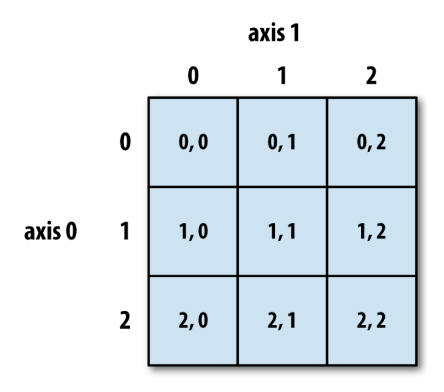

## 5.2. 3차원 어레이 인덱싱

`arr3d`는 (2,2,3) 모양의 3차원 어레이이다.

In [22]:
arr3d = np.array([[[1,2,3],
                   [4,5,6]],
                  
                  [[7,8,9],
                   [10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [24]:
arr3d.shape

(2, 2, 3)

모양이 (2,2,3)인 3차원 어레이의 0번 인덱스 항목은 (2,3) 크기의 2차원 어레이이다.

In [25]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

0번 인덱스 항목인 2차원 어레이의 항목을 일정한 값으로 바꾸기 위해 인덱싱을 활용할 수 있다.

In [26]:
# 기존 항목 기억해 두기
old_values = arr3d[0].copy()

In [27]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [30]:
# arr3d를 계속 사용하기 위해 원래 값으로 되돌린다.
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

모양이 (2,2,3)인 3차원 행렬의 1번 행, 0번 열의 항목은 길이가 3인 1차원 어레이이다.

In [31]:
arr3d[1,0]

array([7, 8, 9])

실제로 아래처럼 1번 행과 1번 행의 0번 열의 값을 확인하면 동일한 값이 나온다.

In [32]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [33]:
x[0]

array([7, 8, 9])

모양이 (2,2,3)인 3차원 행렬의 1번 행, 0번 열, 2번 인덱스의 항목은 길이가 1인 정수 9이다.

In [35]:
arr3d[1, 0, 2]

9

실제로 아래처럼 1번 행과 0번 열, 2번 인덱스의 값을 확인하면 동일한 값이 나온다.

In [37]:
arr3d[1][0][2]

9

### 5.2.1. 2차원 어레이 슬라이싱

In [38]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트 슬라이싱 방식을 동일하게 적용할 수 있다.

- 1번 인덱스 이전까지

In [39]:
arr2d[:1]

array([[1, 2, 3]])

- 2번 인덱스 이전까지

In [40]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

- 전체 항목 슬라이싱

In [41]:
arr2d[:3]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

행과 열을 함께 슬라이싱하려면 행과, 열에 대한 슬라이싱을 동시에 지정한다.

- 행 기준 : 2번 행 이전까지
- 열 기준 : 1번 열부터 끝까지

In [42]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

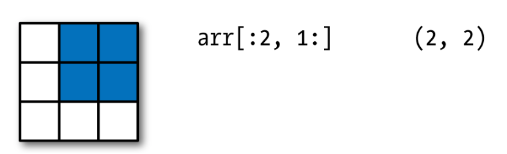

인덱싱과 슬라이싱이 행과 열 각각에 대해 독립적으로 사용될 수 있다.

- 행 기준 : 1번 행 인덱싱
- 열 기준 : 2번 열 이전까지

In [43]:
arr2d[1,:2]

array([4, 5])

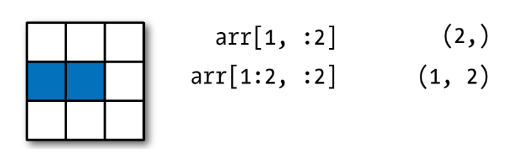

**주의사항** : 인덱싱을 사용하는 만큼 결과 어레이의 차원이 기존 어레이의 차원보다 1씩 줄어든다.

In [44]:
arr2d[1,:2].shape

(2,)

동일한 항목을 사용하지만 인덱싱을 사용할 때와 아닐 때의 결과는 다른 모양의 어레이가 된다.

In [45]:
arr2d[1:2, :2]

array([[4, 5]])

`shpae`은 사용되는 슬라이싱의 구간에 의존한다.

- 행 기준 : 1행 하나만 사용
- 열 기준 : 0행, 2행 두 개 사용

따라서 결과는 (1,2) 모양의 어레이이다.

In [46]:
arr2d[1:2, :2].shape

(1, 2)

- 행 기준 : 행 전체
- 열 기준 : 2번 열 이전까지

In [47]:
arr2d[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

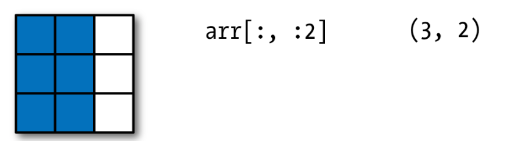

In [49]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [50]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

**Example 5.1**

먼저 아래 그림 모양의 2차원 어레이를 생성한다.

In [52]:
arr = np.arange(36).reshape((6,6)) + np.arange(0, 21, 4).reshape((6,1))
arr

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

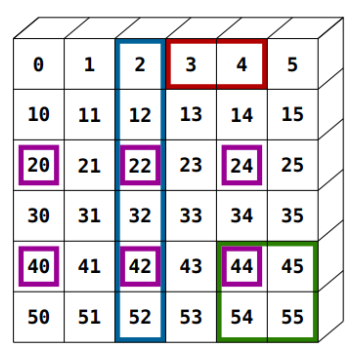

위 그림에 색깔별로 표시된 어레이를 슬라이싱을 이용하여 구하라.

- 빨간색 1차원 어레이

In [53]:
arr[0, 3:5]

array([3, 4])

- 파란색 2차원 어레이

In [61]:
arr[:, 2:3]

array([[ 2],
       [12],
       [22],
       [32],
       [42],
       [52]])

만약에 열에 대해 슬라이싱 대신 인덱싱을 사용하면 1차원 어레이를 얻는다.

In [62]:
arr[:,2]

array([ 2, 12, 22, 32, 42, 52])

- 보라색 2차원 어레이(스텝 활용)

In [63]:
arr[2::2,0::2]

array([[20, 22, 24],
       [40, 42, 44]])

- 초록색 2차원 어레이

In [65]:
arr[4:,4:]

array([[44, 45],
       [54, 55]])

### 5.2.2. 3차원 어레이 인덱싱/슬라이싱

기본적으로 2차원 어레이 슬라이싱 기능과 동일하게 작동한다. 여기서는 칼라 이미지 데이터를 3차원 어레이로, 흑백 이미지를 2차원 어레이로 다루면서 인덱싱과 슬라이싱을 이용하여 이미지를 조작하는 간단한 방법을 설명한다.

먼저 너구리 얼굴 이미지를 가져온다. 알 ㅐ코드는 scipy 패키지에서 기본으로 제공하는 너구리 얼굴 사진을 3차원 어레이로 가져온다.

**주의사항** : 아래와 같은 코드가 있다는 정도 기억해 두기 바란다.

In [66]:
import scipy.misc
face = scipy.misc.face()

`face`는 너구리 얼굴 이미지를 3차원 어레이로 불러온다.

- `imshow()`함수는 3차원 이미지 어레이를 이미지로 보여주는 함수이다.
- `show()`함수는 지정된 여러 개의 이미지를 동시에 화면에 띄우는 기능을 갖는 함수이다.

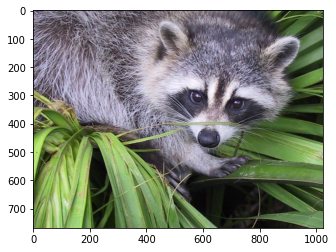

In [68]:
plt.imshow(face)
plt.show()

`face`는 아래 모양의 3차원 어레이를 가리킨다.

In [69]:
face.shape

(768, 1024, 3)

위 이미지에서 세로, 가로, 축에 보여지는 숫자가 픽셀 수를 보여주며 정확한 픽셀 수는 다음과 같다.

- 행 : 768개
- 열 : 1024개
- 각각의 픽셀에 길이가 3인 1차원 어레이 포함

**RNG 색상 정보**

`768x1024`개의 픽샐에 포함된 길이 3인 어레이는 R(빨강), G(초록), B(파랑) 색상에 대한 정보를 각각 담는다. 또한 색상 정보는 각각 0부터 255사이의 값을 사용한다.

어레이에 사용된 값들의 정확한 자료형은 `unit8`, 즉, 8바이트로 표현된 양의 정수 자료형이다.

In [70]:
face.dtype

dtype('uint8')

In [71]:
face.min()

0

In [72]:
face.max()

255

**색상 정보 정규화**

여기서는 픽셀 정보를 0과 1사이의 부동소수점으로 변경해서 사용한다. 이유는 여러 이미지 변환을 시도할 때 0과 1사이의 부동소수점의 값들이 나올 때 정확하게 기능하기 때문이다. 

RGB 정보의 최댓값이 255이기 때문에 모든 항목을 255로 나누어 0과 1사이의 값으로 정규화시킨다.

In [74]:
face = face/255

**흑백 이미지 변환**

흑백 이미지는 보통 하나의 RGB 정보만 가져오는 것으로 구할 수 있다. 예를 들어, 빨간색 정보만 가져오려면 아래처럼 3차원 인덱싱을 실행한다. 아래 코드는 이미지의 행과 열은 그대로 두고 RGB 정보에서 R(빨강)에 대한 정보만 인덱싱으로 가져온다.

In [75]:
face_gray_red = face[:, :, 0]

흑백사진으로 보여주려면 `imshow()` 함수의 `cmap` 키워드 인자를 그레이(회색) 스타일을 사용하도록 지정해야 한다. `cmap`은 색상 지도(color map)을 가리키는 매개변수이며, `gray`를 인자로 지정하면 흑백사진으로 출력한다.

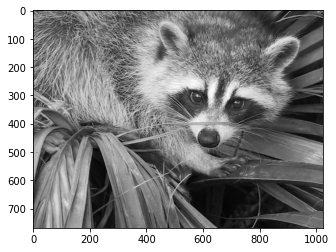

In [94]:
plt.imshow(face_gray_red, cmap='gray')
plt.show()

### 5.2.3. 이미지 크기 조정

이미지 크기 조정은 픽셀 수를 조절하는 방식으로 이루어진다. 가장 단순한 방식은 행과 열에서 각각 2개씩 건너뛰며 픽셀을 선택하는 것이다. 일부 데이터가 상실되지만 작은 이미지에는 눈으로 보일 정도로 영향을 받지는 않는다.

아래 코드는 행과 열에 대해 모두 스텝 2를 지정하고 슬라이싱을 적용한다. 즉, `2x2` 모양을 이루는 네 개의 픽셀 중에 상단 왼편에 있는 픽셀만 선택한다.

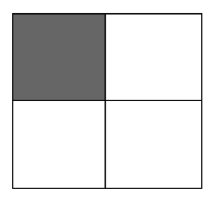

In [91]:
face_half_simple = face[::2, ::2,:]

행과 열의 픽셀 수가 모두 절반으로 줄었다.

In [92]:
face_half_simple.shape

(384, 512, 3)

이미지를 확인하면 살짝 흐려진 느낌을 받는다.

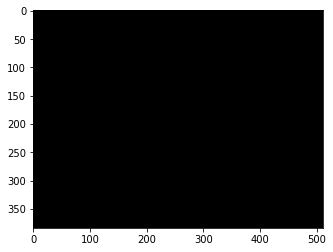

In [93]:
plt.imshow(face_half_simple)
plt.show()

**보간법**

가장 일반적으로 사용되는 이미지 변경 방법은 `보간법`(interpolation)이다. 이미지 크기 변경에 사용되는 다양한 보간법 기법이 있지만 여기서는 두 픽셀 사이의 평균값을 취하는 방식을 이용한다. 

아래 코드는 짝수 인덱스의 값과 홀수 인덱스의 값의 평균을 취하는 방식으로 보간법을 활용한다.

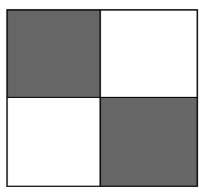

In [96]:
face_half_interpolation = (face[::2, ::2, :] + face[1::2, 1::2, :])/2

In [98]:
face_half_interpolation.shape

(384, 512, 3)

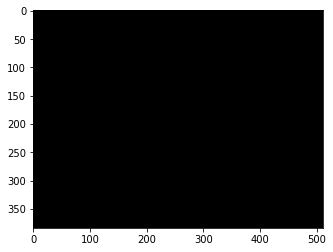

In [100]:
plt.imshow(face_half_interpolation)
plt.show()

4분의 1 크기의 두 이미지 데이터가 조금 다르기는 하지만 이미지 상으로 차이점을 발견하기 어렵다.

In [101]:
face_half_interpolation[:2]

array([[[0.0018, 0.0017, 0.0019],
        [0.0022, 0.0021, 0.0024],
        [0.0023, 0.0022, 0.0025],
        ...,
        [0.0019, 0.002 , 0.0012],
        [0.0018, 0.0019, 0.0011],
        [0.0021, 0.0022, 0.0014]],

       [[0.0013, 0.0012, 0.0015],
        [0.0018, 0.0017, 0.002 ],
        [0.0019, 0.0018, 0.0022],
        ...,
        [0.0017, 0.0018, 0.001 ],
        [0.0017, 0.0019, 0.001 ],
        [0.002 , 0.0021, 0.0013]]])

In [103]:
face_half_simple[:2]

array([[[0.0019, 0.0017, 0.002 ],
        [0.0024, 0.0022, 0.0025],
        [0.0024, 0.0022, 0.0026],
        ...,
        [0.0021, 0.0022, 0.0014],
        [0.0018, 0.0019, 0.0011],
        [0.002 , 0.0021, 0.0013]],

       [[0.0011, 0.001 , 0.0013],
        [0.0018, 0.0017, 0.0019],
        [0.002 , 0.0018, 0.0022],
        ...,
        [0.0017, 0.0018, 0.001 ],
        [0.0016, 0.0018, 0.0009],
        [0.002 , 0.0022, 0.0013]]])

4차원 이상의 어레이에 대해서는 기본적으로 2, 3차원 어레이 대상과 동일하게 작동한다. 하지만 시각화가 기본적으로 불가능하고, 사람이 직접 4차원 이상의 슬라이싱을 조작하는 것도 매우 어렵다. 따라서 2, 3차원 어레이 슬라이싱의 기본 아이디어만 이해핬다면 그것으로 충분하다는 점만 언급한다.

## 5.3. 부울 인덱싱

부울 인덱싱은 앞서 설명한 인덱싱/슬라이싱 기법이 처리하지 못하는 인덱싱/슬라이싱을 지원한다.

### 5.3.1. 1차원 부울 어레이 활용

1차원 부울 어레이를 이용한 인덱싱을 설명하기 위해 아래 두 개의 어레이를 이용한다.

- 중복된 이름을 포함하면서 길이가 7인 1차원 어레이

In [104]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

- (7, 4) 모양의 2차원 어레이 무작위 생성
  - `randn()` 함수는 표준 정규 분포를 이용하여 임의의 부동소수점으로 이루어진 어레이 생성
  - **주의사항** : 인자로 하나의 튜플이 아닌 여러 개의 인자 사용. 각각의 인자가 각각의 행(axis = 0), 열(axis = 1) 등에 사용되는 항목의 개수 지정

In [105]:
np.random.seed(3)

data = np.random.randn(7, 4)
data

array([[ 1.7886,  0.4365,  0.0965, -1.8635],
       [-0.2774, -0.3548, -0.0827, -0.627 ],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [ 0.8813,  1.7096,  0.05  , -0.4047],
       [-0.5454, -1.5465,  0.9824, -1.1011],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

`names`에 포함된 이름이 Bob인지 여부를 확인하면 부울 값으로 이루어진 길이가 7인 어레이가 생성된다. 즉, 항목별 비교 연산이 이루어진다.

In [106]:
name_Bob = names == 'Bob'
name_Bob

array([ True, False, False,  True, False, False, False])

이제부터 `name_Bob`이 가리키는 길이가 7인 1차원 어레이에서 `True`가 위치한 인덱스를 이용하여 `data`가 가리키는 2차원 어레이를 대상으로 부울 인덱싱이 작동하는 방법을 설명한다.  
  
  
먼저 `data`의 행의 길이가 7임에 주목하라. 이제 `name_Bob`에서 `True`가 위치한 인덱스에 해당하는 항목만 `data`에서 슬라이싱하려면 다음과 같이 부울 인덱싱을 사용한다. 결과는 `data`에서 0번행과 3번행만 가져온다. 이유는 `name_Bob`에서 0번, 3번 인덱스의 항목만 `True`이기 때문이다.

In [107]:
data[name_Bob]

array([[ 1.7886,  0.4365,  0.0965, -1.8635],
       [ 0.8813,  1.7096,  0.05  , -0.4047]])

이처럼 1차원 부울 어레이를 이용한 인덱싱은 하나의 축에 대해 슬라이싱을 적용하는 것과 동일하게 작동한다. 다만, 부울 어레이의 길이가 사용되는 축의 길이와 동일해야 한다. 따라서 부울 인덱싱과 일반 인덱싱, 슬라이싱을 혼합할 수 있다.

- 행 기준 : Bob이 포함된 행의 인덱스를 갖는 행
- 열 기준 : 2번 열 이후 전체

In [108]:
data[name_Bob, 2:]

array([[ 0.0965, -1.8635],
       [ 0.05  , -0.4047]])

- 행 기준 : Bob이 포함된 행의 인덱스를 갖는 행
- 열 기준 : 3번 열

In [109]:
data[name_Bob, 3]

array([-1.8635, -0.4047])

부울 연산자(`~, &, |`)를 사용하여 얻어진 부울 어레이 표현식을 부울 인덱싱에 직접 활용할 수 있다. 예를 들어, 이름이 Bob이 아닌 이름이 위치한 인덱스에 해당하는 행만 가져오려면 `==` 대신에 `~=`를 이용하거나 `==`와 `~` 연산자를 함께 이용한다.

In [111]:
data[names != 'Bob']

array([[-0.2774, -0.3548, -0.0827, -0.627 ],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [-0.5454, -1.5465,  0.9824, -1.1011],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

In [112]:
data[~name_Bob]

array([[-0.2774, -0.3548, -0.0827, -0.627 ],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [-0.5454, -1.5465,  0.9824, -1.1011],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

다음은 Bob 또는 Will이 위치한 인덱스에 해당하는 행만 가져온다.

In [115]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [116]:
data[mask]

array([[ 1.7886,  0.4365,  0.0965, -1.8635],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [ 0.8813,  1.7096,  0.05  , -0.4047],
       [-0.5454, -1.5465,  0.9824, -1.1011]])

### 5.3.2. 항목 업데이트

1차원 부울 배열을 이용하여 전체 행 또는 전체 열을 특정 값으로 변경할 수 있다.

아래 코드는 `names`에서 Joe가 사용되지 않은 항목의 인덱스에 해당하는 행에 포함된 항목을 모두 7로 변경한다.

In [118]:
mask = names != 'Joe'
mask

array([ True, False,  True,  True,  True, False, False])

In [119]:
data[mask] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [-0.2774, -0.3548, -0.0827, -0.627 ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

### 5.3.3. 부울 인덱싱 활용 변수 선언

부울 인덱싱은 뷰를 이용하지 않고 항상 새로운 어레이를 생성한다.

In [120]:
data2 = data[names == 'Bob']
data2

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.]])

`data2`의 0번 행을 모두 -1로 변경해도 `data`는 변하지 않는다.

In [121]:
data2[0] = -1
data2

array([[-1., -1., -1., -1.],
       [ 7.,  7.,  7.,  7.]])

하지만 `data`는 변경되지 않았다.

In [122]:
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [-0.2774, -0.3548, -0.0827, -0.627 ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

### 5.3.4. 다차원 부울 어레이 활용

아래 표현식은 `data`와 동일한 모양의 부울 어레이를 생성한다. 이유는 부등호 연산이 항목별로 작동하기 때문이다.

In [123]:
mask = data < 0
mask

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True,  True, False, False],
       [ True,  True, False,  True]])

음수 항목만 끄집어 내면 1차원 어레이가 된다.

In [124]:
data[mask]

array([-0.2774, -0.3548, -0.0827, -0.627 , -1.185 , -0.2056, -1.0238,
       -0.713 , -0.1605])

`mask`를 이용하여 모든 음수 항목을 0으로 변경할 수도 있다. 방식은 리스트의 인덱싱을 이용하여 항목을 변경하는 방식과 매우 유사하다.

In [125]:
data[mask] = 0
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 1.4861, 0.2367],
       [0.    , 0.    , 0.6252, 0.    ]])

## 5.4. 팬시 인덱싱

**팬시 인덱싱**fancy indexing은 정수 배열을 이용한다. 아래 (8, 4) 모양의 2차원 어레이를 이용해서 팬시 인덱싱을 설명한다. 팬시 인덱싱은 객체를 항상 새로 생성한다. 즉, 뷰 기능을 이용하지 않는다.

In [127]:
arr = np.empty((8, 4))

In [128]:
for i in range(8):
  arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

아래 코드는 `arr`의 4번, 3번, 0번, 6번 인덱스에 해당하는 항목을 모아서 새로운 어레이를 생성한다.

In [129]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

음수를 인덱스로 사용하면 맨 아래에 위치한 행부터 순서를 매긴다. 밑에서 셋째, 다섯째, 일곱째 항목으로 이루어진 어레이는 다음과 같이 구한다.

In [130]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

여러 개의 인덱스 어레이를 사용하면 1차원 어레이가 생성된다. 이유는 각각의 인덱스 어레이가 각 축의 좌표로 사용되기 때문이다.

In [131]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

(1, 0), (5, 3), (7, 2), (2, 2) 좌표에 위치한 항목으로 이루어진 어레이는 다음과 같이 축별로 항목을 모아놓은 두 개의 어레이를 사용해서 팬시 인덱싱을 진행한다.

In [132]:
arr[[1, 5, 7, 2],[0, 3, 1, 2]]

array([ 4, 23, 29, 10])

2차원 어레이를 얻고자 한다면 다음과 같이 해야 한다.

In [135]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**Example 5.2**

아래 이미지 모양의 2차원 어레이에서 색깔로 구분된 1차원 또는 2차원 어레이를 추출해보자.
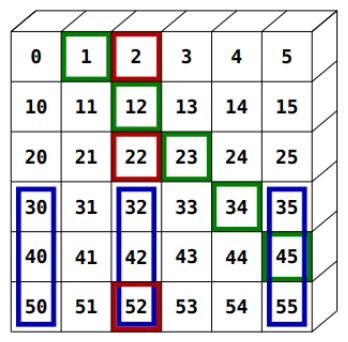

먼저 이미지 모양의 2차원 어레이를 다음처럼 생성한다.

In [138]:
arr = np.arange(36).reshape(6,6) + np.arange(0, 21, 4).reshape(6,1)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

- 초록색 1차원 어레이

In [143]:
arr[(0, 1, 2, 3, 4), (1, 2, 3, 4, 5)]

array([ 1, 12, 23, 34, 45])

- 빨간색 1차원 어레이

In [151]:
mask = np.array([1,0,1,0,0,1], dtype=bool)
arr[mask,2]

array([ 2, 22, 52])

- 파란색 2차원 어레이

In [157]:
arr[3:, [0,2,5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

# 5.5 연습문제

https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-array_indexing.ipynb